# Forest Cover Type Prediction
Author: Morariu Tudor

## Pas 1: Citirea si Procesarea datelor

In [9]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

data = pd.read_csv("train.csv");
data.drop(columns=["Id"], inplace=True);

display(data);

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15116,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


### Pas 2: Matrice de correlatie

<AxesSubplot:title={'center':'Matrice de Coreletie'}>

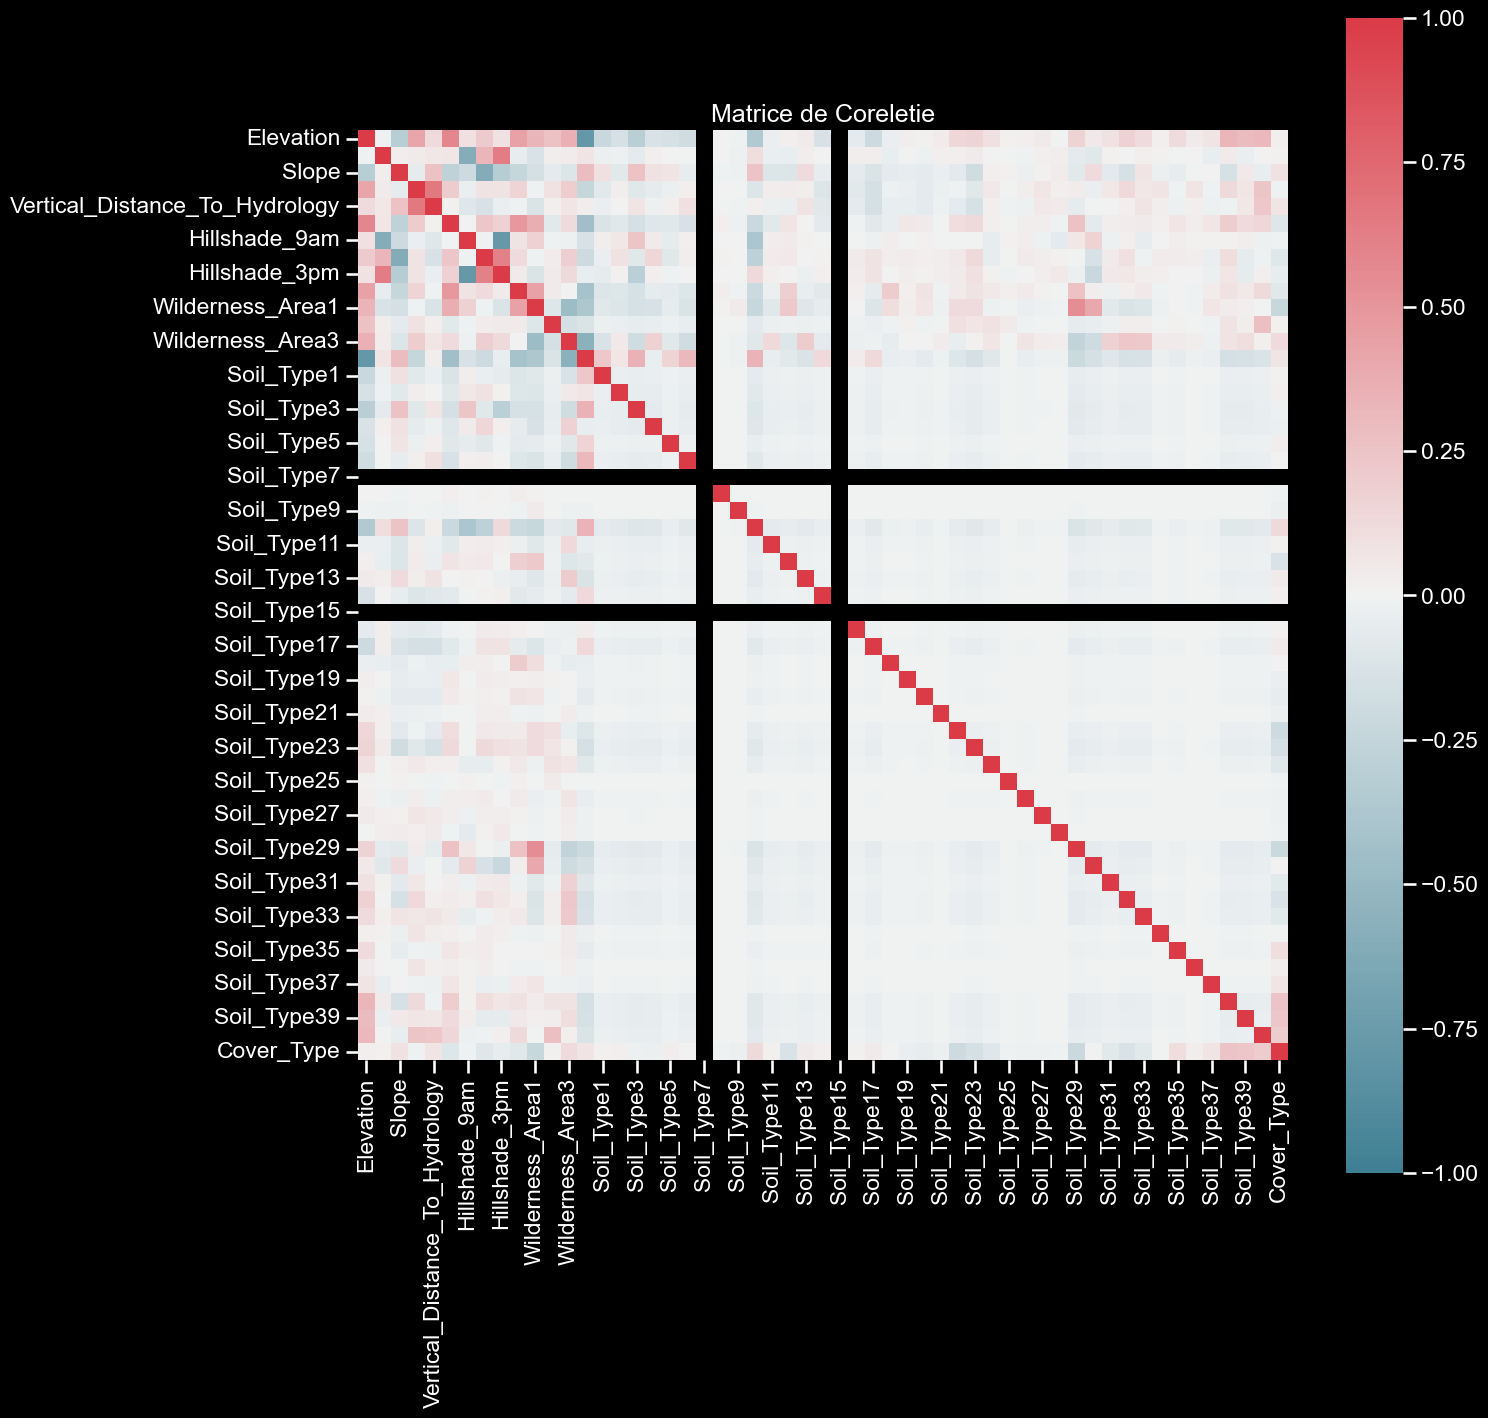

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")


f, ax = plt.subplots(figsize=(15, 15))
corr = data.corr()
ax.set_title("Matrice de Coreletie");
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0, square=True, ax=ax)

*   **Obs**: Valoarea *Cover_Type* nu este puternic corelata de nici o variabila.

### Pas 3: Plot PCA 2D

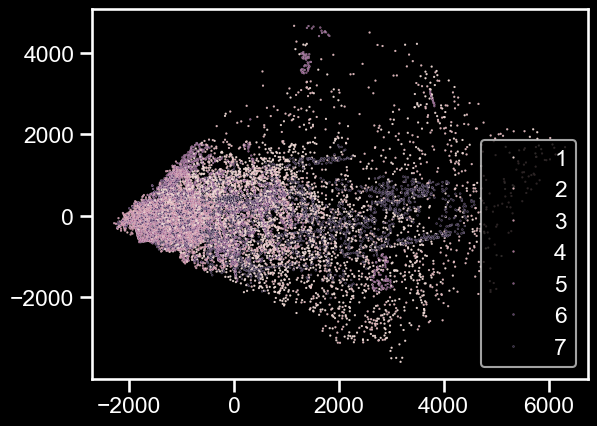

In [11]:
from sklearn.decomposition import PCA
import numpy as np

pca2d = PCA(n_components=2);

pca2d_data_points = np.array(pca2d.fit_transform(data));

sns.scatterplot(x=pca2d_data_points[:, 0], y=pca2d_data_points[:, 1], hue=data["Cover_Type"].values, s=2, legend="full");



### Pas 3: Plot PCA 3D

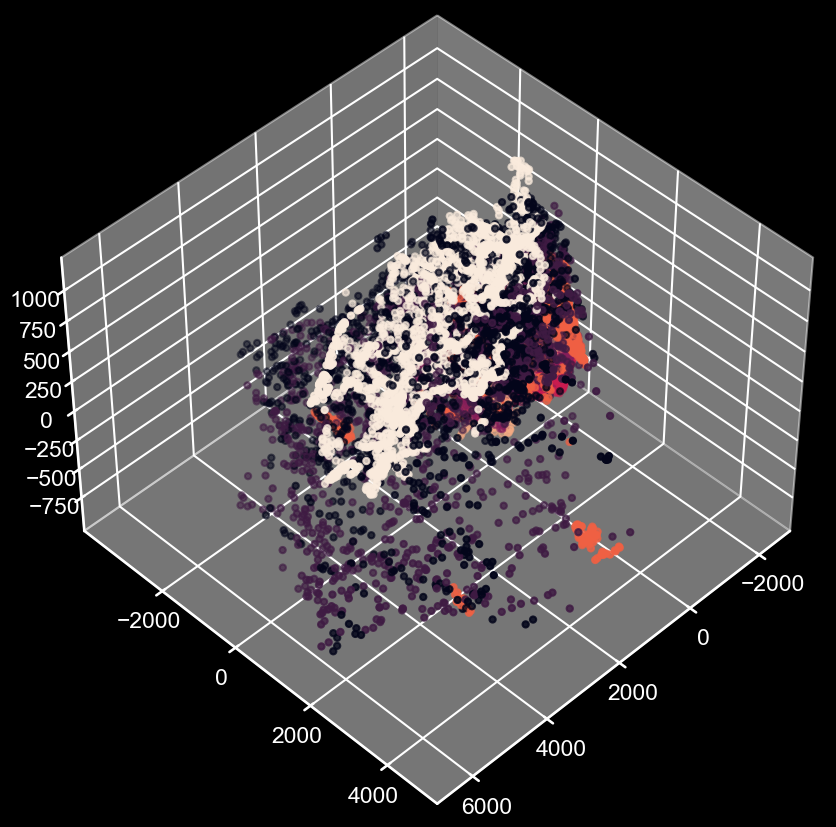

In [12]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

pca3d = PCA(n_components=3);
pca3d_data_points = np.array(pca3d.fit_transform(data));

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)

fig.add_axes(ax)
ax.view_init(90, 90)
ax.scatter3D(pca3d_data_points[:, 0], pca3d_data_points[:, 1], pca3d_data_points[:, 2], c=data["Cover_Type"].values)
plt.savefig("plot3d_1.png");

ax.view_init(180, 0)
plt.savefig("plot3d_2.png");

ax.view_init(45, 45)
plt.savefig("plot3d_3.png");


<img title="3D PCA plot" src="./plot3d_1.png" width="500" height="500">
<img title="3D PCA plot" src="./plot3d_2.png" width="500" height="500">
<img title="3D PCA plot" src="./plot3d_3.png" width="500" height="500">

## Pas 6: Normalizare

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler();

# label_col = data["Cover_Type"];

# data = pd.DataFrame(scaler.fit_transform(data), data.index, data.columns);

# data.drop(columns=["Cover_Type"], inplace=True);
# data["Cover_Type"] = label_col;

display(data);

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15116,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


## Pas 5: Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(data, test_size=0.3);

## Pas 6: Alegerea si Antrenarea Modelului

### Pas 6.1: Random Decision Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=1000);

train_labels = train["Cover_Type"];
test_labels = test["Cover_Type"];

train_features = train.drop(columns="Cover_Type");
test_features = test.drop(columns="Cover_Type");

model.fit(train_features, train_labels);
print("Scor: %.4f" % model.score(test_features, test_labels))


Scor: 0.8466


### Pas 6.2: MLPClassifier

In [16]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=1000, learning_rate_init=1e-4, solver='adam', verbose=1);

train_labels = train["Cover_Type"];
test_labels = test["Cover_Type"];

train_features = train.drop(columns="Cover_Type");
test_features = test.drop(columns="Cover_Type");

history = model.fit(train_features, train_labels);

print(model.score(test_features, test_labels));

Iteration 1, loss = 28.54332401
Iteration 2, loss = 28.00750289
Iteration 3, loss = 26.73698682
Iteration 4, loss = 24.67933626
Iteration 5, loss = 23.45978781
Iteration 6, loss = 21.33531891
Iteration 7, loss = 19.61700388
Iteration 8, loss = 17.28258913
Iteration 9, loss = 14.69171671
Iteration 10, loss = 12.74586838
Iteration 11, loss = 11.31152168
Iteration 12, loss = 10.20711865
Iteration 13, loss = 9.30659318
Iteration 14, loss = 8.60839978
Iteration 15, loss = 8.03289023
Iteration 16, loss = 7.59542941
Iteration 17, loss = 7.22779373
Iteration 18, loss = 6.91367888
Iteration 19, loss = 6.61253311
Iteration 20, loss = 6.31005777
Iteration 21, loss = 6.07296118
Iteration 22, loss = 5.82123043
Iteration 23, loss = 5.60462558
Iteration 24, loss = 5.41466482
Iteration 25, loss = 5.17957562
Iteration 26, loss = 5.02223222
Iteration 27, loss = 4.87887223
Iteration 28, loss = 4.65960688
Iteration 29, loss = 4.55946981
Iteration 30, loss = 4.38416791
Iteration 31, loss = 4.23561284
Itera

### Pas 6.3: SVC

In [17]:
from sklearn.svm import SVC

model = SVC(degree=7, max_iter=10000);

train_labels = train["Cover_Type"];
test_labels = test["Cover_Type"];

train_features = train.drop(columns="Cover_Type");
test_features = test.drop(columns="Cover_Type");

model.fit(train_features, train_labels);

print(model.score(test_features, test_labels))

0.6283068783068783


### Pas 6.4: Keras Neural Network

In [1]:
import keras
from keras import layers
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.utils import shuffle

train = shuffle(train)
test = shuffle(test);

train_labels = train["Cover_Type"];
test_labels = test["Cover_Type"];

train_features = train.drop(columns=["Cover_Type"]);
test_features = test.drop(columns="Cover_Type");


model = keras.Sequential()
model.add(Dense(10, input_shape=(54,), activation='elu'))
model.add(Dense(5, input_shape=(10,), activation='elu'))
model.add(Dense(1, input_shape=(5,)))

print(model.summary())
x = train_features;
y = model(x)

print(y);

epoci = 100;

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.MeanSquaredError(), metrics=["acc"]);

History = model.fit(train_features, train_labels, epochs=epoci, validation_data=(test_features, test_labels));

NameError: name 'train' is not defined

#### Pas 6.4.1: Plot Loss si Acuratete

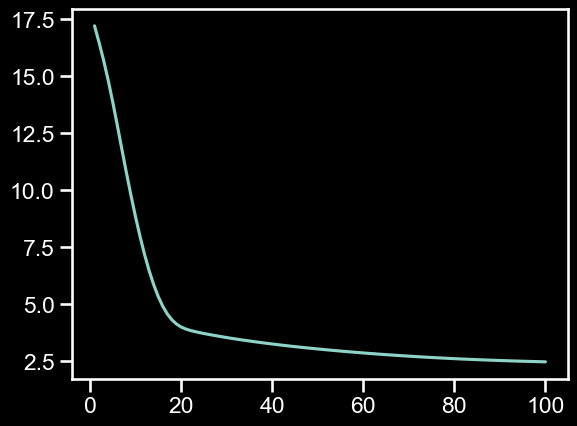

In [ ]:
plt.plot(np.arange(1, epoci + 1, 1), History.history["val_loss"])